<h1> K-Medias clustering</h1>

<h3>Importar librerias</h3>

In [6]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<h2> k-means en un dataset generado al azar</h2>

Generar dataset aleatoriamente

In [9]:
# Configurar una semilla aleatoria(random seed)
np.random.seed(0)

Crear clusters aleatorios de puntos usando la clase make_blobs. La clase <b> make_blobs </b> puede aceptar varias entradas, pero se usaran concretamente estas:

<b> <u> Entrada </u> </b>
<ul>
    <li> <b>n_samples</b>: El número total de puntos equitativamente divididos entre los clusters. </li>
    <ul> <li> El valor será: 5000 </li> </ul>
    <li> <b>centers</b>: El número de centros a generar. </li>
    <ul> <li> El valor será: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: El desvío estándar de los clusters. </li>
    <ul> <li> El valor será: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Salida </u> </b>
<ul>
    <li> <b>X</b>: Arreglo de la forma [n_samples, n_features]. (Matríz de Distancia)</li>
    <ul> <li> Muestras generadas. </li> </ul> 
    <li> <b>y</b>: Arreglo de la forma [n_samples]. (Response Vector)</li>
    <ul> <li> Las etiquetas de números enteros para la pertenencia de cluster en cada muestra. </li> </ul>
</ul>


In [10]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

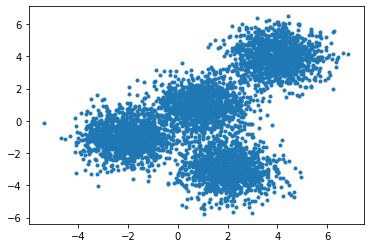

In [17]:
# Mostrar los puntos de los datos generados al azar
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h3> Estableciendo K-Medias</h3>

La clase KMedias tiene muchos parámetros que se pueden utilizar, se utilizarán estos tres:
<ul>
    <li> <b>init</b>: Método de inicialización de los centroides. </li>
    <ul>
        <li> El valor será: "k-means++" </li>
        <li> k-means++: Elije centros de clusters iniciales eficientes para el clustering k-media de forma tal de acelerar la convergencia.</li>
    </ul>
    <li> <b>n_clusters</b>: El número de clusters a formar y la cantidad de centroides a generar. </li>
    <ul> <li> El valor será: 4 (tenemos 4 centros)</li> </ul>
    <li> <b>n_init</b>: Cantidad de veces que el algoritmo k-medias se ejecutará con diferentes semillas centroides. El resultado final será la mejor salida de consecutivas ejecuciones de n_init en términos de inercia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Inicializar KMedias con estos parámetros, donde el parámetro de salida se llama <b>k_means</b>.

In [19]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [20]:
# Ahora, unamos el modelo KMedias con la matriz de distancia que creamos anteriormente, X 
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Ahora juntemos las etiquetas de cada punto en el modelo usando el atributo de KMedias <b> .labels\_ </b> y lo guardamos como <b> k_means_labels </b> 

In [21]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

También obtendremos las coordenadas de los centros del cluster usando KMedias <b> .cluster&#95;centers&#95; </b> y guardémoslo en <b> k_means_cluster_centers </b>

In [22]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h3>Creando la Trama</h3>

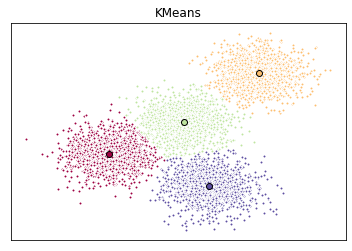

In [24]:
# Inicializar el dibujo con las dimensiones especificadas.
fig = plt.figure(figsize=(6, 4))

# Los colores usan un mapa de color, dónde produciremos un arreglo de colores basados en
# el número de etiquetas que hay. Usaremos set(k_means_labels) para obtener
# etiquetas unívocas.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Crear un dibujo
ax = fig.add_subplot(1, 1, 1)

# Loop For que dibuja los puntos de datos y los centroides.
# k tomará valores entre 0-3, los cuales coincidirán con los clusters posibles en el
# que está cada punto.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Crear una lista de todos los puntos, donde aquellos que están 
    # en el cluster (ej. cluster 0) están etiquetados como verdadero, o en su defecto
    # estarán etiquetados como falso.
    my_members = (k_means_labels == k)
    
    # Definir el centroide o centro del cluster.
    cluster_center = k_means_cluster_centers[k]
    
    # Dibjuar los puntos de datos con color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Dibujo de los centroides con un color específico pero una linea más oscura
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Título del dibujo
ax.set_title('KMeans')

# Eliminar los ticks del eje x
ax.set_xticks(())

# Eliminar los ticks del eje y
ax.set_yticks(())

# Mostrar el dibujo
plt.show()


<h2> K-means para la segmentación del cliente</h2>

In [34]:
import pandas as pd
cust_df = pd.read_csv('../data/k_means_customers.csv', delimiter=",")
#cust_df[0:5]
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h3> Pre-procesamiento</h3>

In [37]:
# Address en este set de datos es una variable categórica
# El algoritmo k-medias no está directamente aplicado a variables categóricas porque la función de la distancia Euclediana no tiene sentido para variables discretas. 
# Por lo que descartaremos esta característica y seguiremos adelante para correr el clustering.
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [38]:
# Normalizando el desvío estándar
# La normalización es un método estadístico que ayuda a los algoritmos basados en matemática interpretar características con distintas magnitudes y distribuciones de manera igual. 
# Usamos StandardScaler() para normalizar nuestros set de datos.

from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h3>Ejecución de K-means </h3> 

In [40]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

Asignamos las etiquetas a cada fila dentro del marco de datos.

In [41]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


Podemos revisar fácilmente los valores centroides sacando el promedio de las características de cada cluster.


In [42]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


Ahora, miremos la distribuición de los clientes basados en su edad e ingreso:

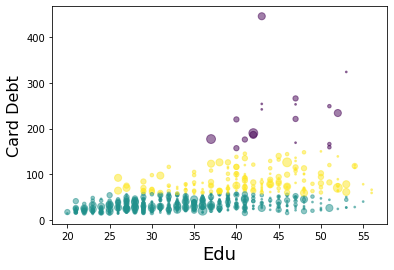

In [46]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

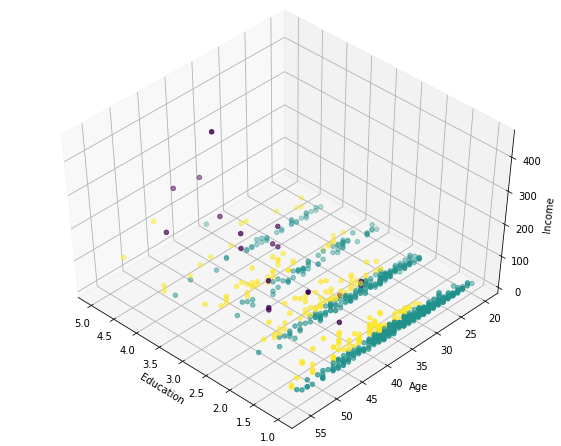

In [47]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))